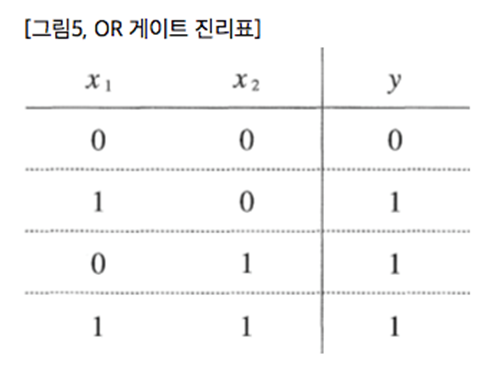

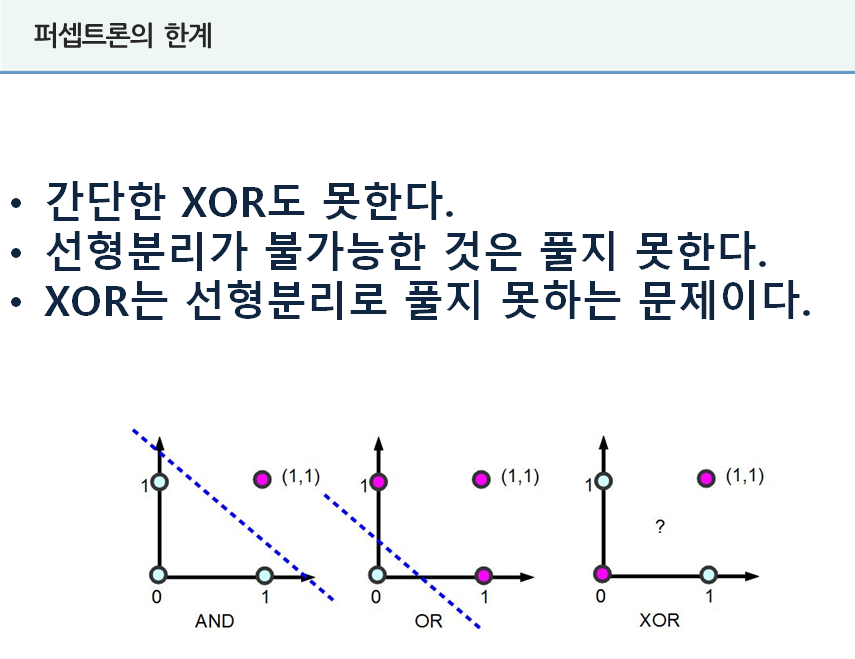

In [1]:
import numpy as np
import tensorflow as tf
tf.enable_eager_execution()

In [2]:
# XOR연산의 X1, X2 입력을 저장하는 배열
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype = "float32")

X

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [3]:
# XOR연산의 y출력을 저장하는 배열
y = np.array([
    [0],
    [1],
    [1],
    [0]
], dtype = "float32")

y

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [4]:
y.shape

(4, 1)

순전파 참고자료
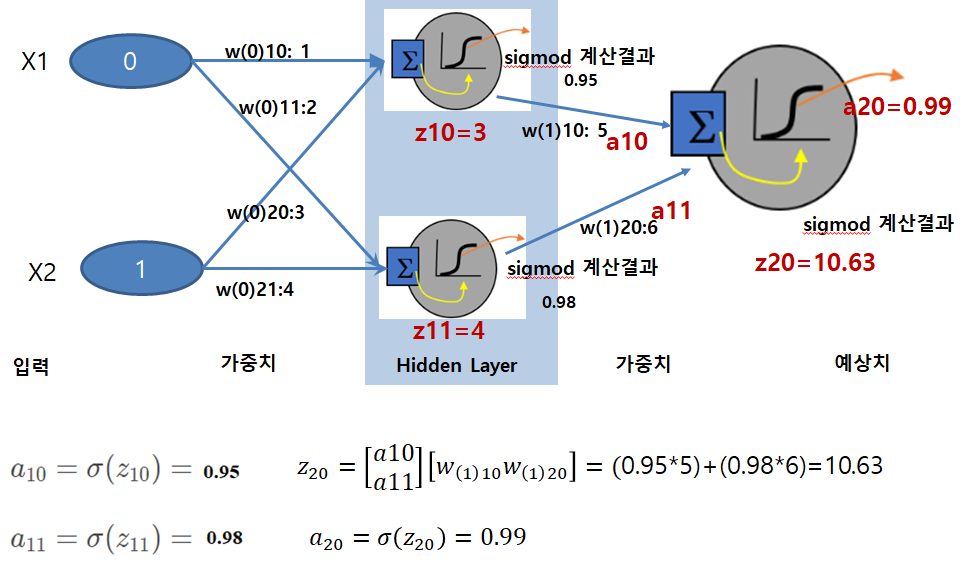

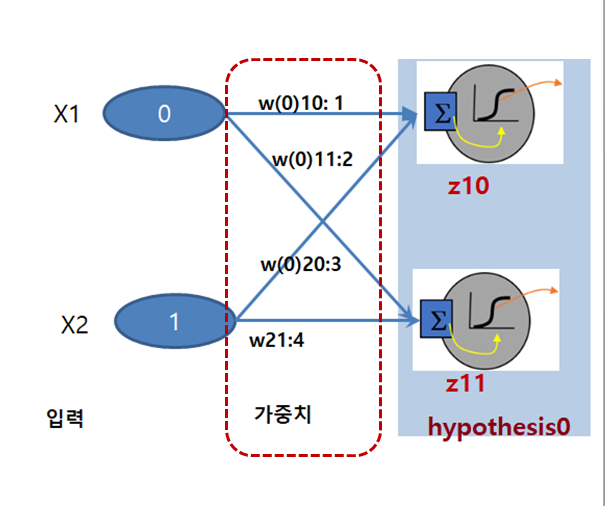

In [5]:
# tf.Variable
w0 = tf.Variable([
    [1, 2],
    [3, 4]
], dtype = "float32")

w0

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [6]:
b0 = tf.Variable([[0, 0]], dtype = "float32")

b0

<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[0., 0.]], dtype=float32)>

In [7]:
arr = np.array([
    [0, 1]
], dtype = "float32")

arr

array([[0., 1.]], dtype=float32)

In [8]:
tf.matmul(arr, w0)

<tf.Tensor: id=21, shape=(1, 2), dtype=float32, numpy=array([[3., 4.]], dtype=float32)>

In [9]:
tf.matmul(arr, w0) + b0

<tf.Tensor: id=26, shape=(1, 2), dtype=float32, numpy=array([[3., 4.]], dtype=float32)>

In [10]:
tf.sigmoid(
    tf.matmul(arr, w0) + b0
)

<tf.Tensor: id=32, shape=(1, 2), dtype=float32, numpy=array([[0.95257413, 0.98201376]], dtype=float32)>

In [11]:
hypothesis0 = tf.sigmoid(tf.matmul(arr, w0) + b0)
hypothesis0

<tf.Tensor: id=38, shape=(1, 2), dtype=float32, numpy=array([[0.95257413, 0.98201376]], dtype=float32)>

In [12]:
# hypothesis0 가 (1, 2) 행렬이기 때문에 w1 이 (2, 1) 이라면 연산가능, 하나로 출력가능
w1 = tf.Variable([
    [5],
    [6]
], dtype = "float32")

w1

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[5.],
       [6.]], dtype=float32)>

In [13]:
b1 = tf.Variable([[0]], dtype = "float32")

b1

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.]], dtype=float32)>

In [14]:
tf.matmul(hypothesis0, w1) + b1

<tf.Tensor: id=60, shape=(1, 1), dtype=float32, numpy=array([[10.654953]], dtype=float32)>

In [15]:
# 값이 너무 크니까 sigmoid 함수 사용: 0 ~ 1 사이의 값으로 출력
tf.sigmoid(
    tf.matmul(hypothesis0, w1) + b1
)

<tf.Tensor: id=65, shape=(1, 1), dtype=float32, numpy=array([[0.9999764]], dtype=float32)>

여기까지 arr로 실행한 결과

이 다음부터 강의자료에 나온 X를 사용

In [16]:
tf.matmul(X, w0) +b0

<tf.Tensor: id=70, shape=(4, 2), dtype=float32, numpy=
array([[0., 0.],
       [3., 4.],
       [1., 2.],
       [4., 6.]], dtype=float32)>

In [17]:
hypothesis0 = tf.sigmoid(tf.matmul(X, w0) +b0)

hypothesis0

<tf.Tensor: id=76, shape=(4, 2), dtype=float32, numpy=
array([[0.5       , 0.5       ],
       [0.95257413, 0.98201376],
       [0.7310586 , 0.8807971 ],
       [0.98201376, 0.99752736]], dtype=float32)>

In [18]:
tf.matmul(hypothesis0, w1) + b1

<tf.Tensor: id=80, shape=(4, 1), dtype=float32, numpy=
array([[ 5.5     ],
       [10.654953],
       [ 8.940075],
       [10.895233]], dtype=float32)>

In [19]:
hypothesis1 = tf.sigmoid(tf.matmul(hypothesis0, w1) + b1)

hypothesis1

<tf.Tensor: id=85, shape=(4, 1), dtype=float32, numpy=
array([[0.9959299],
       [0.9999764],
       [0.999869 ],
       [0.9999814]], dtype=float32)>

In [20]:
# w와 b이 값을 자동으로 수정하는 Optimizer 객체를 생성
optimizer = tf.train.AdamOptimizer(0.1)

In [21]:
for step in range(5000):
    with tf.GradientTape() as tape:
        # 순전파 한번 출발
        hypothesis0 = tf.sigmoid(tf.matmul(X, w0) + b0)
#         print("hypothesis0: ", hypothesis0)
#         print("=" * 50)
        hypothesis1 = tf.sigmoid(tf.matmul(hypothesis0, w1) + b1)
#         print("hypothesis1: ", hypothesis1)
#         print("=" * 50)

        cost = -tf.reduce_mean(\
                               y * tf.log(hypothesis1)\
                              + (1 - y) * tf.log(1 - hypothesis1))
#         print("cost: ", cost)
#         print("=" * 50)

        # 기울기 구하자
        # cost가 0이 되는 (w0, b0), (w1, b1)의 기울기를 계산해서 grads에 대입
        # Backpropagation 실행
        grads = tape.gradient(cost, [w0, w1, b0, b1])
#         print("grads: ", grads)
#         print("=" * 50)

        optimizer.apply_gradients(grads_and_vars = zip(grads,[w0, w1, b0, b1]))

#         print("=" * 50)
#         print("w0: ", w0)
#         print("=" * 50)
#         print("b0: ", b0)
#         print("=" * 50)
#         print("w1: ", w1)
#         print("=" * 50)
#         print("b1: ", b1)
#         print("=" * 50)
        
        if step % 100 == 0:
            print("cost: {}, w0: {}, w1: {}".format(cost, w0, w1))

cost: 4.0991926193237305, w0: <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.9000014, 1.9000086],
       [2.9000015, 3.9000084]], dtype=float32)>, w1: <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.9],
       [5.9]], dtype=float32)>
cost: 0.557486355304718, w0: <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-2.0565376, -4.4126096],
       [ 1.2810546,  3.060032 ]], dtype=float32)>, w1: <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[2.685531 ],
       [3.8502126]], dtype=float32)>
cost: 0.5103297233581543, w0: <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-2.5863264, -6.2746296],
       [ 1.5904136,  4.880547 ]], dtype=float32)>, w1: <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[2.3543894],
       [4.411695 ]], dtype=float32)>
cost: 0.49529534578323364, w0: <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-2.8877606, -7.3770666],
 

cost: 0.00204339437186718, w0: <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ -8.085321, -12.427614],
       [  8.573951,  12.442619]], dtype=float32)>, w1: <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-12.558692],
       [ 13.109066]], dtype=float32)>
cost: 0.001675998792052269, w0: <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ -8.184335, -12.440248],
       [  8.684058,  12.500908]], dtype=float32)>, w1: <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-12.950263],
       [ 13.491261]], dtype=float32)>
cost: 0.0014093072386458516, w0: <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ -8.269622, -12.452357],
       [  8.777928,  12.548829]], dtype=float32)>, w1: <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-13.292454],
       [ 13.826859]], dtype=float32)>
cost: 0.0012071061646565795, w0: <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
arr

In [22]:
# Gradient Decent를 이용하여 계산한 w0
w0

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ -9.124643, -12.649009],
       [  9.688229,  12.943771]], dtype=float32)>

In [23]:
# Gradient Decent를 이용하여 계산한 b0
b0

<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[ 4.2849054, -7.1995916]], dtype=float32)>

In [24]:
# Gradient Decent를 이용하여 계산한 w1
w1

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-17.039648],
       [ 17.550507]], dtype=float32)>

In [25]:
# Gradient Decent를 이용하여 계산한 b1
b1

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[8.180047]], dtype=float32)>

In [26]:
hypothesis0 = tf.sigmoid(tf.matmul(X, w0) + b0)
predict = tf.sigmoid(tf.matmul(hypothesis0, w1) + b1)
predict

<tf.Tensor: id=415391, shape=(4, 1), dtype=float32, numpy=
array([[1.8133699e-04],
       [9.9982232e-01],
       [9.9967980e-01],
       [1.6499007e-04]], dtype=float32)>

In [27]:
# tf.cast(조건): 조건을 만족하는 데이터 혹은 True는 1, 그렇지 않으면 0 변환
# -> 0.5 초과는 1로 변환, 0.5 이하는 0으로 변환
predict01 = tf.cast(predict > 0.5, dtype = tf.float32)
print("=" * 50)
print("predict01")
print(predict01)

predict01
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)


In [28]:
ac01 = tf.equal(predict01, y)
ac01

<tf.Tensor: id=415396, shape=(4, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True]])>

In [29]:
ac02 = tf.cast(ac01, dtype = "float32")
ac02

<tf.Tensor: id=415397, shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [30]:
# tf.reduce_mean(): 변환한 0과 1의 합을 구한 후에 데이터 수로 나눔
ac03 = tf.reduce_mean(ac02)
ac03

<tf.Tensor: id=415399, shape=(), dtype=float32, numpy=1.0>

In [32]:
# ac01, ac02, ac03의 계산 과정을 한번에 함: (정확도)를 계산
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict01, y), dtype = "float32"))
print("=" * 50)
print("accuracy")
print(accuracy)

accuracy
tf.Tensor(1.0, shape=(), dtype=float32)
